# Context

## Title

**Abstract:**
One-sentence description

**Description:**
In the following cell, I...


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sys
import os

sys.path.append("..")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'

from config import ROOT
from func.plots import NATURE_PALETTE as nature_colors

os.chdir(ROOT)

/Users/songshgeo/opt/anaconda3/envs/WAInstitution_YRB_2021/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Yellow River Breaks

**Abstract:**
One-sentence description

**Description:**
In the following cell, I...


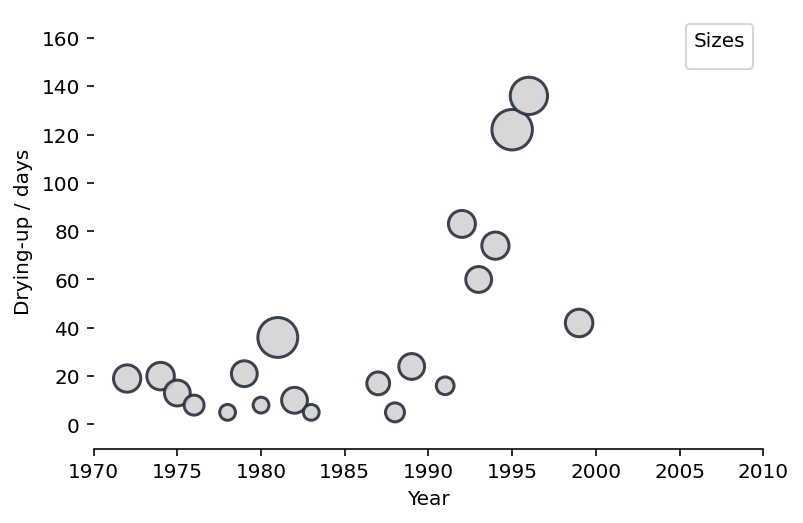

In [2]:
outage = pd.read_excel(r"data/source/river break.xlsx")

PERIODS = {
    1978: 'start',
    1987: '87-WAS', 
    1998: '98-UBR', 
    2008: 'end',
}

def plot_outage(ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(9, 2))
    bubbles = ax.scatter(
        x=outage['年份'],
        y=outage['断流天数'],
        s=outage['断流长度']*0.6,
        color='lightgray',
        edgecolors=nature_colors['Nature'],
        linewidth=1.5,
        alpha=0.9,
        label='Drying-up',
        zorder=1
    )
    ax.set_xlim(1970, 2010)
    ax.set_ylim(-10, 170)
#     ax.axvline(1987, ls=':', color=nature_colors['NS'], lw=3, label='Policy 1', zorder=0)
#     ax.axvline(1998, ls=':', color=nature_colors['NG'], lw=3, label='Policy 2', zorder=0)
#     ax.axvline(1978, ls='-.', color='gray', lw=1, label='Study period division')
#     ax.axvline(2008, ls='-.', color='gray', lw=1)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)

    # ax.axvspan(1975, 1987, alpha=0.1, label='Structure 1')
    # ax.axvspan(1987, 1998, alpha=0.1, color='red', label='Mismatched institution')
    # ax.axvspan(1998, 2008, alpha=0.1, color='green', label='Structure 3')

    ax.set_xlabel("Year")
    ax.set_ylabel("Drying-up / days")
    return bubbles

fig, ax = plt.subplots()
scatter = plot_outage(ax=ax)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.9)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
plt.show();

## Drought

**Abstract:**
One-sentence description

**Description:**
In the following cell, I...


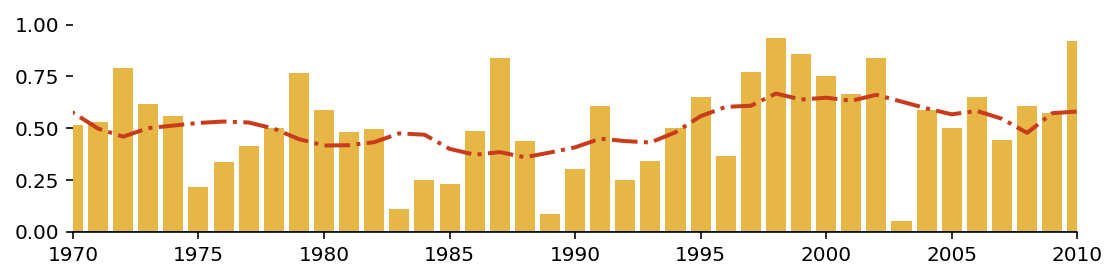

In [3]:
drought = pd.read_excel(r"data/source/干旱严重程度.xlsx", index_col=0)
drought.columns = [f'm{i}' for i in (1, 3, 6, 12)]
col = "m1"

def plot_drought(col, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(9, 2))
    mean_10 = drought.rolling(window=10, min_periods=10, center=True).mean()[col]
    # drought[col].plot.bar(ax=ax)
    ax.bar(x=drought[col].index, height=drought[col].values, color="#e0a418", alpha=0.8, label='Drought', zorder=0)
    ax.plot(mean_10.index, mean_10.values, ls="-.", lw=2, color=nature_colors['NS'], label='10yrs-Avg. drought index')
    ax.set_xlim(1970, 2010)
    ax.axhline()
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)


plot_drought(col)
plt.show();

In [4]:
?scipy.stats.ttest_rel

Object `scipy.stats.ttest_rel` not found.


In [5]:
import scipy
droughts_p1 = drought['m1'].loc[1988:1998]
droughts_p2 = drought['m1'].loc[1998:2008]
t, pval = scipy.stats.ttest_ind(droughts_p1, droughts_p2)

print("Differences between Droughts 1988~1998; 1998~2008:\n")
droughts_p1.mean()
droughts_p2.mean()
t
pval

Differences between Droughts 1988~1998; 1998~2008:



0.47601090909090904

0.62562

-1.4274436166089306

0.16888017399371735

1998-UBR 之后的速度: 
{'k_obs': -0.4944821307463725, 'k_syn': 0.6383439904333252}


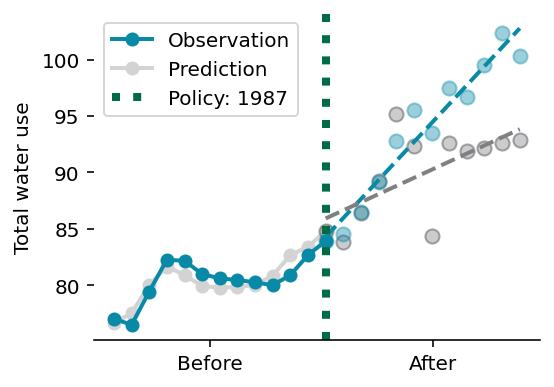

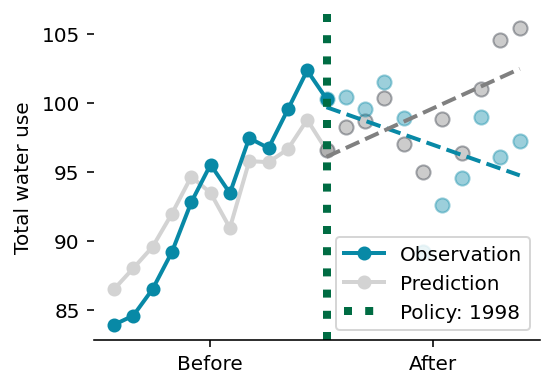

In [6]:
from func.handle import ExpResultsHandler

YAML_87 = "reports/n1987/87_all_wci.yaml"
exp87 = ExpResultsHandler(yaml_file=YAML_87)
exp87.load_from_pickle()
k_87 = exp87.plot_pre_post()

YAML_98 = "reports/n1998/98_all_wci.yaml"
exp98 = ExpResultsHandler(yaml_file=YAML_98)
exp98.load_from_pickle()
k_98 = exp98.plot_pre_post()

print("1998-UBR 之后的速度: ")
print(k_98)
plt.show();

In [7]:
synth, actual = exp87.summarize_analysis()
start = 1988
estimation = synth.loc[start:].sum()
observation = actual.loc[start:].sum()
ratio = 100 * (observation - estimation) / estimation
print(f"From {start} to 1998, the observed water use of the YRB provinces reached ${observation:.2f} km^3$ in sum while the estimation of water use only suggest ${estimation:.2f} km^3$, ${ratio:.2f}\%$ increased.")

From 1988 to 1998, the observed water use of the YRB provinces reached $1038.36 km^3$ in sum while the estimation of water use only suggest $993.59 km^3$, $4.51\%$ increased.


## Summary Plot

**Abstract:**
One-sentence description

**Description:**
In the following cell, I...


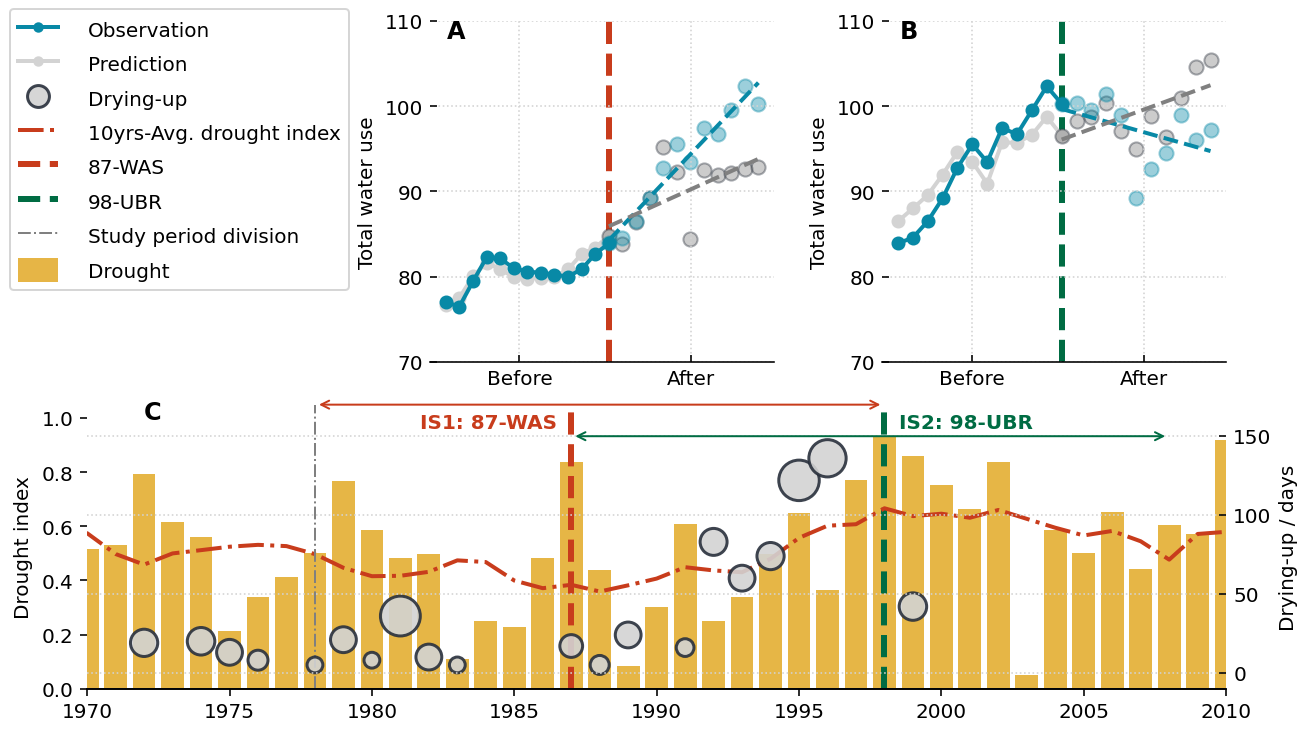

In [8]:
fig = plt.figure(figsize=(9, 5), constrained_layout=True)

# prepare plotting
gs = fig.add_gridspec(ncols=3, nrows=2, hspace=0.0, height_ratios=[1.2, 1], width_ratios=[7, 10, 10])

ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])
ax3 = ax4.twinx()

# plots
exp87.plot_pre_post(ax=ax1, axvline=False)
exp98.plot_pre_post(ax=ax2, axvline=False)
bubbles = plot_outage(ax=ax3)
plot_drought('m1', ax4)
ax1.legend_.remove()
ax2.legend_.remove()
# beauty & annotation

ax1.axvline(1987, ls='--', color=nature_colors['NS'], lw=3, zorder=0)
ax2.axvline(1998, ls='--', color=nature_colors['NG'], lw=3, zorder=0)

ax4.set_ylabel("Drought index")
ax3.annotate("",
        xy=(1978, ax3.get_ylim()[1]), xycoords='data',
        xytext=(1998, ax3.get_ylim()[1]), textcoords='data',
        arrowprops=dict(arrowstyle="<->",
                       connectionstyle='arc3',
                       color=nature_colors['NS'],))
ax3.annotate("",
        xy=(1987, 150), xycoords='data',
        xytext=(2008, 150), textcoords='data',
        arrowprops=dict(arrowstyle="<->",
                       connectionstyle='arc3',
                       color=nature_colors['NG'],))

ax4.axvline(1987, ls='--', color=nature_colors['NS'], lw=3, label='87-WAS', zorder=0)
ax4.axvline(1998, ls='--', color=nature_colors['NG'], lw=3, label='98-UBR', zorder=0)
ax4.axvline(1978, ls='-.', color='gray', lw=1, label='Study period division')
# ax3.text("")
legend_handles = []
legend_labels = []
for handle, label in zip(*ax2.get_legend_handles_labels()):
    legend_handles.append(handle)
    legend_labels.append(label)
for handle, label in zip(*ax3.get_legend_handles_labels()):
    legend_handles.append(handle)
    legend_labels.append(label)
for handle, label in zip(*ax4.get_legend_handles_labels()):
    legend_handles.append(handle)
    legend_labels.append(label)
    
ax3.text(1986.5, 155, "IS1: 87-WAS", color=nature_colors['NS'], horizontalalignment='right', weight='bold')
ax3.text(1998.5, 155, "IS2: 98-UBR", color=nature_colors['NG'], horizontalalignment='left', weight='bold')

# 使用图片的比例来定位
def get_position_by_ratio(ax, x_ratio, y_ratio):
    """
    使用图片的比例来返回定位，从而更好的控制说明文字的位置
    ax: 一个 matplotlib 的画图轴对象
    x_ratio: 横坐标的比例位置
    y_ratio: 纵坐标的比例位置
    """
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    x = (x_max-x_min) * x_ratio + x_min
    y = (y_max-y_min) * y_ratio + y_min
    return x, y

for ax in [ax1, ax2]:
    ax.set_yticks(range(70, 111, 10))
    
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.grid(True, color='lightgray', ls=":")
    ax.tick_params(direction='in')
    x, y = get_position_by_ratio(ax, 0.05, 0.95)
    ax.text(x, y, ("A", "B", "C")[i], weight='bold', fontsize=12)

legend = fig.legend(loc='upper left', handles=legend_handles, labels=legend_labels, handletextpad=1.5, handleheight=1.5, markerscale=0.7)
plt.savefig("figs/outputs/main_results2.pdf", format='pdf')
plt.show();

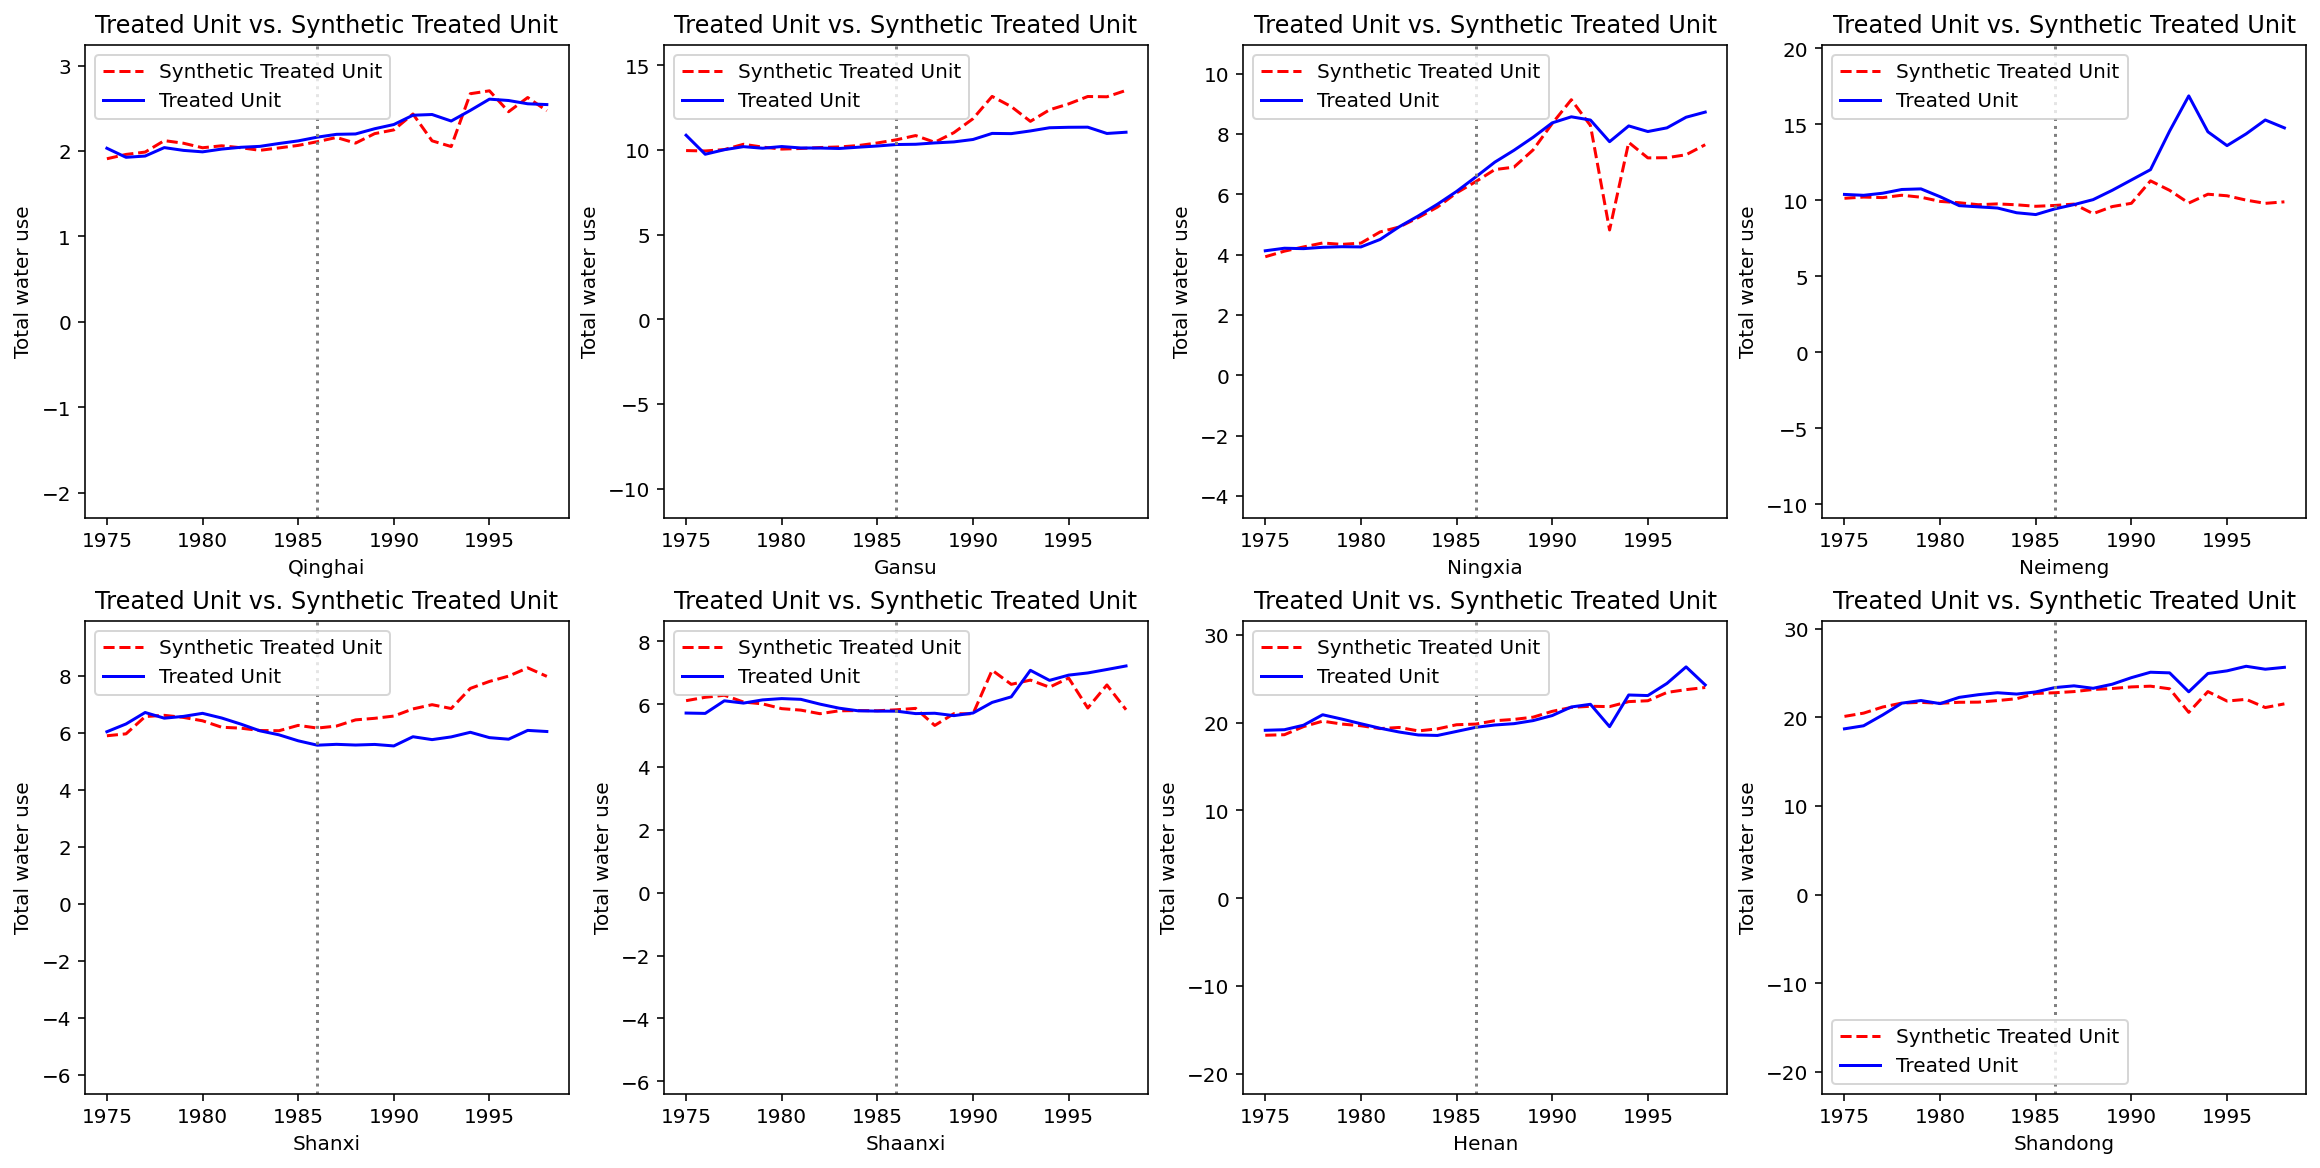

In [9]:
exp87.panel_plots()

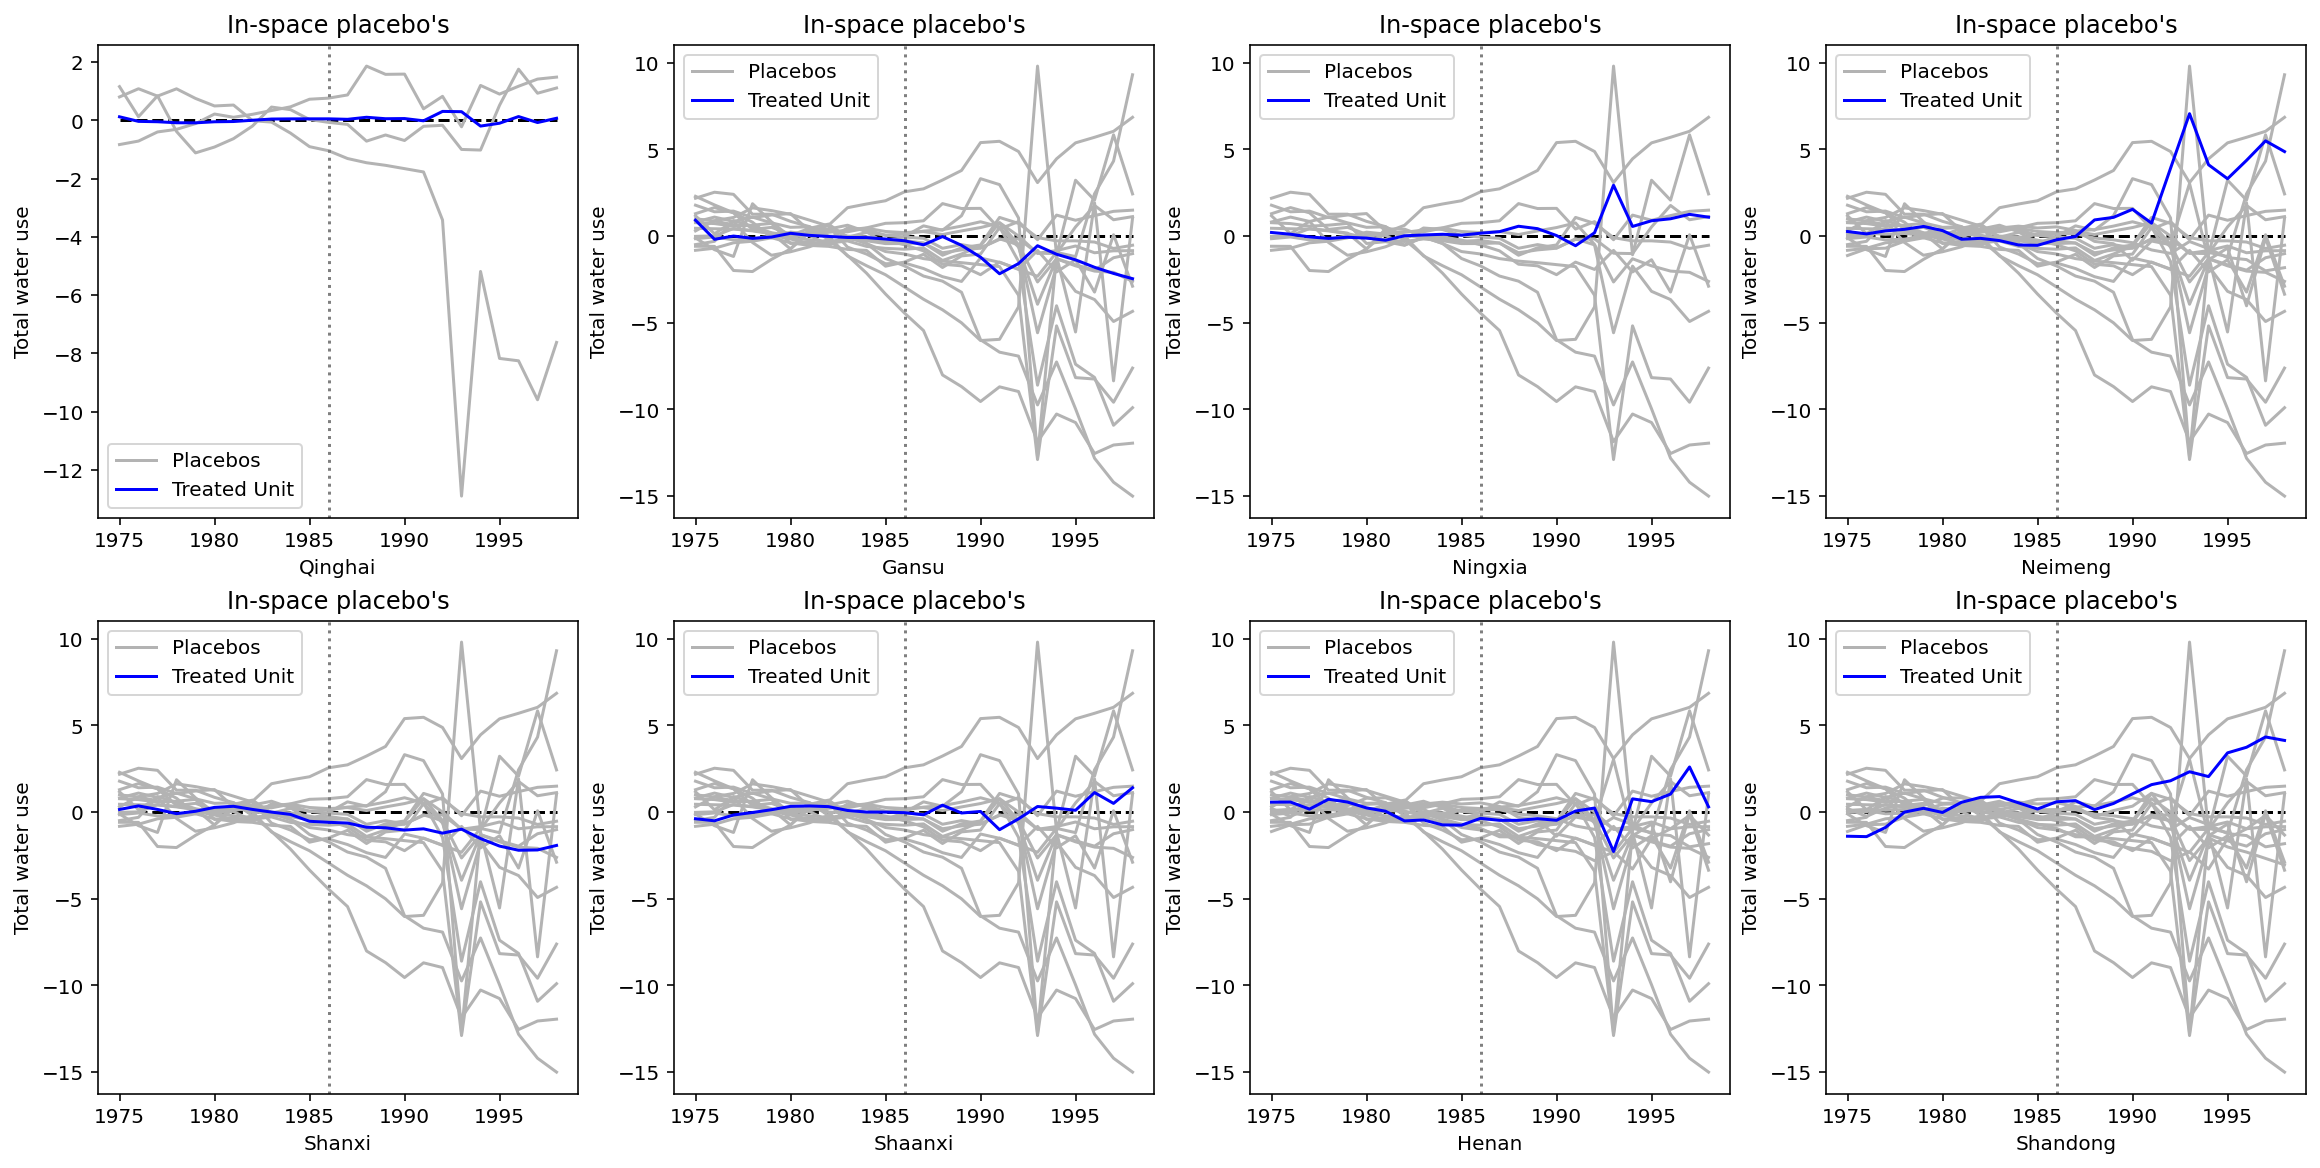

In [10]:
exp87.panel_plots('in-space placebo')

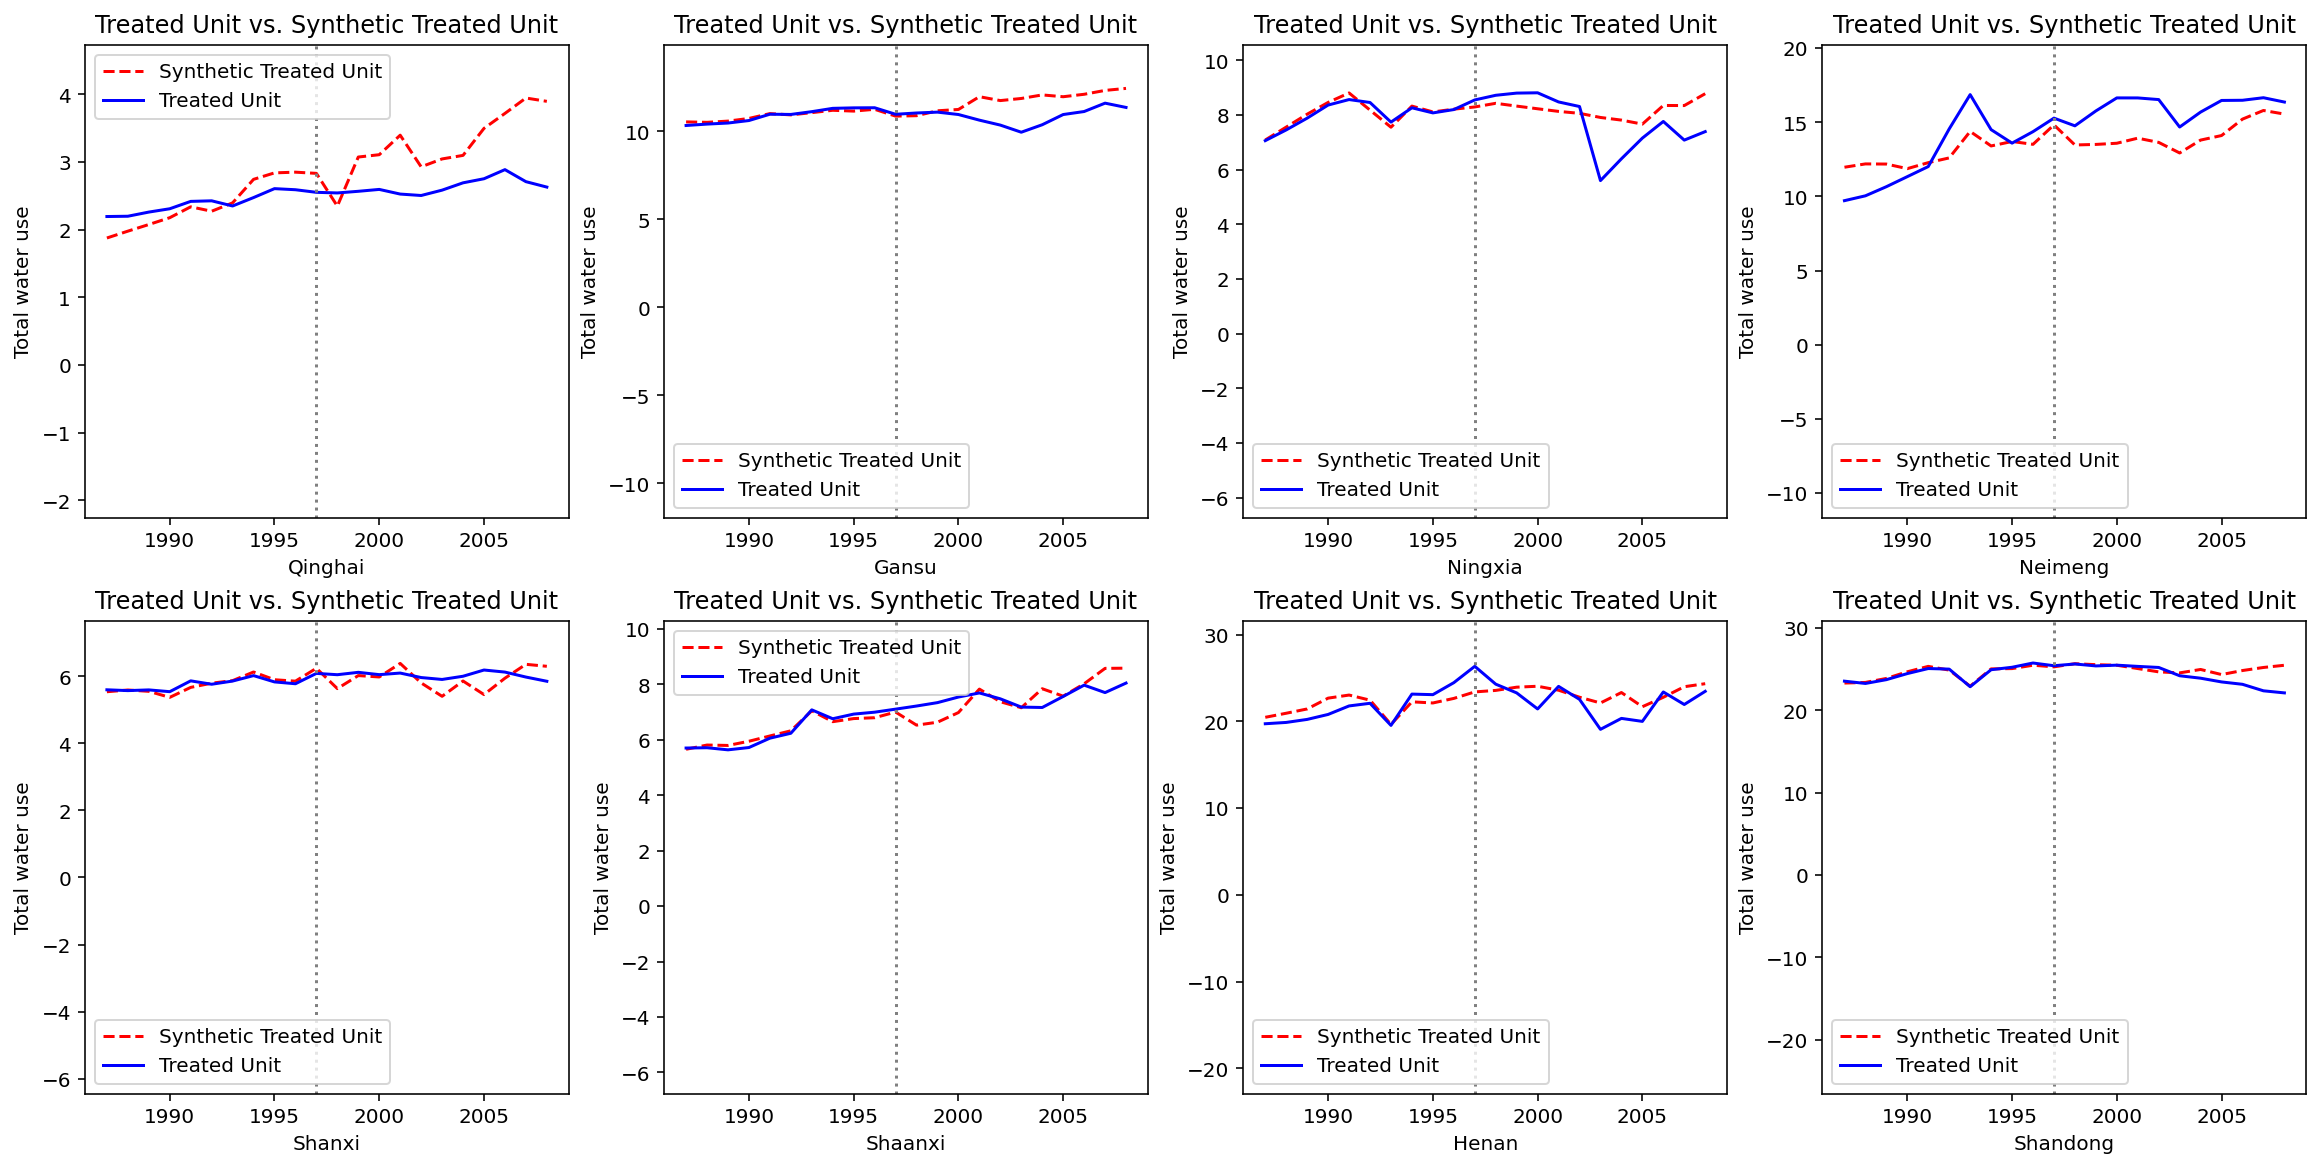

In [11]:
exp98.panel_plots()